## Load New Bedford dataset

In [1]:
import pandas as pd

In [2]:
nb_incidents = pd.read_csv('../../datasets/field_incident_reports.csv')

In [3]:
nb_incidents.head()

,Unnamed: 0,DATE,TIME,NUM,ADDRESS,LAT,LONG,SEX,RACE,AGE,PRECISION,Ethnicity,OfficerID,OfficerFirstName,OfficerLastName,OfficerDesignation
0,2953,20150102,1736,15-1-FI,"34 WING ST, New Bedford, MA",41.626941,-70.925961,F,U,13,Exact,U,3974,Roberto,DaCunha,(4B-3974)
1,2955,20150102,1736,15-1-FI,"34 WING ST, New Bedford, MA",41.626941,-70.925961,M,B,14,Exact,N,3974,Roberto,DaCunha,(4B-3974)
2,2954,20150102,1736,15-1-FI,"34 WING ST, New Bedford, MA",41.626941,-70.925961,M,W,14,Exact,N,3974,Roberto,DaCunha,(4B-3974)
3,2956,20150102,1736,15-1-FI,"34 WING ST, New Bedford, MA",41.626941,-70.925961,M,W,15,Exact,N,3974,Roberto,DaCunha,(4B-3974)
4,1620,20150323,47,15-101-FI,"1642 ACUSHNET AVE, New Bedford, MA",41.665114,-70.928598,M,W,38,Exact,N,4031,Nathan,Avelar,(2A-4031)


# Most Prolific Officers Analysis

## Race and Ethnicity distributions

<AxesSubplot:title={'center':'Distribution of ethnicity'}>

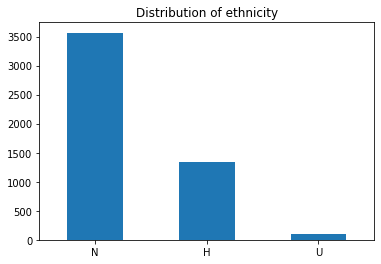

In [4]:
nb_incidents['Ethnicity'].value_counts().plot(kind='bar', orientation='vertical', rot=0, title='Distribution of ethnicity')

<AxesSubplot:title={'center':'Distribution of race'}>

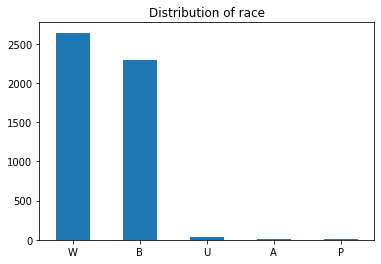

In [5]:
nb_incidents['RACE'].value_counts().plot(kind='bar', orientation='vertical', rot=0, title='Distribution of race')

In [6]:
print(f"Number of officers in New Bedford dataset: {len(nb_incidents['OfficerID'].unique())}")

Number of officers in New Bedford dataset: 185


## Compute 10 most prolific New Bedford officers

In [7]:
top_officer_ids = nb_incidents['OfficerID'].value_counts().rename_axis('OfficerID').reset_index(name='Incidents')

In [8]:
top_officers = pd.merge(top_officer_ids, nb_incidents[['OfficerID', 'OfficerFirstName', 'OfficerLastName', 'OfficerDesignation']], on='OfficerID', how='left').drop_duplicates(subset='OfficerID').reset_index(drop=True)
top_officers.index += 1

In [9]:
top_officers.head(10)

,OfficerID,Incidents,OfficerFirstName,OfficerLastName,OfficerDesignation
1,3974,459,Roberto,DaCunha,(4B-3974)
2,4020,305,Brian,Rei,(5B-4020)
3,3987,299,Lorenzo,Gonzalez,(3B-3987)
4,3875,266,Gene,Fortes,(2C-3875)
5,4001,241,Clint,Medas,(2C-4001)
6,4002,194,Jorge,Santos,(3C-4002)
7,4042,161,Pedro,Moco,(6A-4042)
8,4045,148,Samuel (4045),Algarin-Mojica,(2C)
9,4011,120,Jason,Orlando,(1A-4011)
10,4073,96,Nathaniel,Goncalo,(2A-4073)


# Incedent Time of Day Analysis

In [10]:
time_bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400]

## Overall distribution of incedent time

In [11]:
incidents_by_time = pd.cut(nb_incidents.TIME, time_bins)

In [12]:
incidents_by_time = nb_incidents.groupby(incidents_by_time)['TIME'].agg(['count']).reset_index()

In [13]:
incidents_by_time = incidents_by_time.rename(columns={'count': 'Incidents', 'TIME': 'Time'})

<AxesSubplot:xlabel='Time of day (24hr)'>

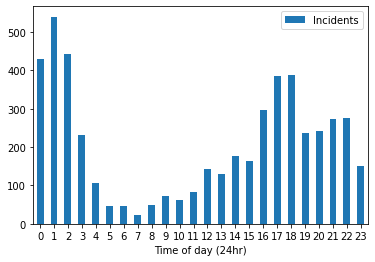

In [15]:
incidents_by_time.reset_index().plot.bar(x='index', y='Incidents', rot=0, xlabel='Time of day (24hr)')

## Distribution of incident time by top 10 most prolific officers

In [291]:
incidents_by_officer_by_time = nb_incidents.groupby(['OfficerID', pd.cut(nb_incidents.TIME, time_bins)])

In [292]:
incidents_by_officer_by_time = incidents_by_officer_by_time.size().unstack(level=1)

In [293]:
incidents_by_officer_by_time.to_csv('data.csv')
incidents_by_officer_by_time = pd.read_csv('data.csv')

In [294]:
incidents_by_officer_by_time = incidents_by_officer_by_time.set_index('OfficerID')
incidents_by_officer_by_time = incidents_by_officer_by_time.reindex(index=top_officers['OfficerID'])
incidents_by_officer_by_time = incidents_by_officer_by_time.reset_index()

In [295]:
incidents_by_officer_by_time = incidents_by_officer_by_time.merge(top_officers, on='OfficerID', how='left')

In [296]:
incidents_by_officer_by_time = incidents_by_officer_by_time.rename(columns={'(0, 100]': '1', '(100, 200]': '2', '(200, 300]': '3', '(300, 400]': '4', '(400, 500]': '5', '(500, 600]': '6', '(600, 700]': '7', '(700, 800]': '8', '(800, 900]': '9', '(900, 1000]': '10', '(1000, 1100]': '11', '(1100, 1200]': '12', '(1200, 1300]': '13', '(1300, 1400]': '14', '(1400, 1500]': '15', '(1500, 1600]': '16', '(1600, 1700]': '17', '(1700, 1800]': '18', '(1800, 1900]': '19', '(1900, 2000]': '20', '(2000, 2100]': '21', '(2100, 2200]': '22', '(2200, 2300]': '23', '(2300, 2400]': '24'})

In [314]:
import matplotlib.pyplot as plt
%matplotlib inline

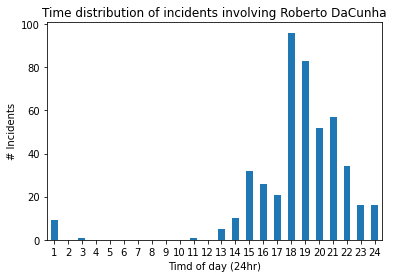

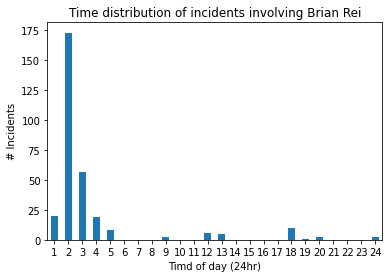

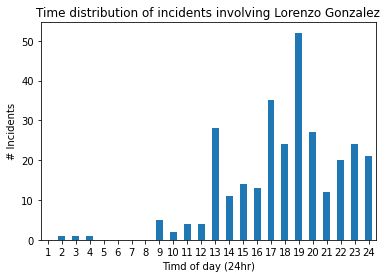

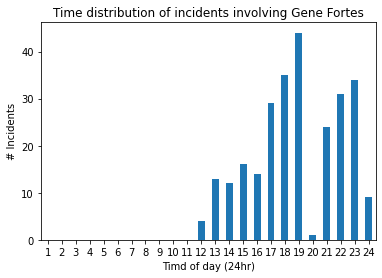

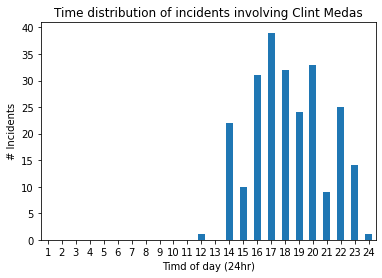

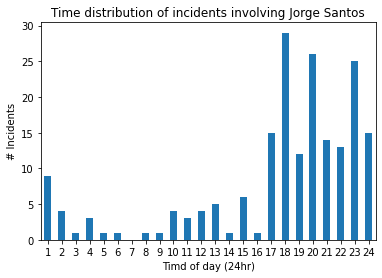

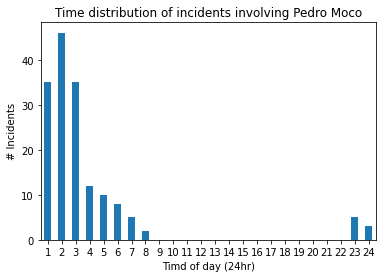

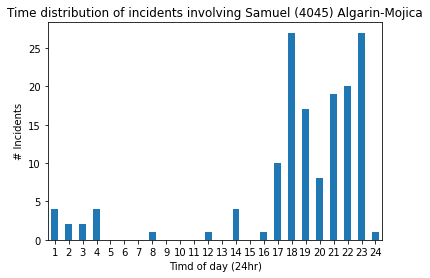

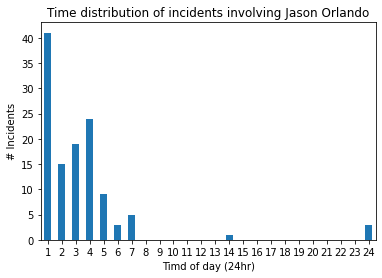

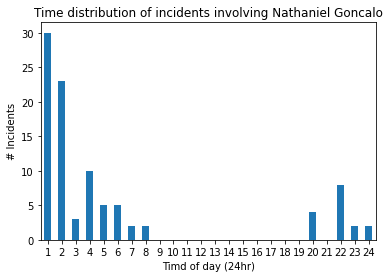

In [315]:
for i in range(10):
    row = incidents_by_officer_by_time.iloc[i]
    row.loc['1':'24'].plot(kind='bar', rot=0, xlabel='Timd of day (24hr)', ylabel='# Incidents', title=f"Time distribution of incidents involving {row['OfficerFirstName']} {row['OfficerLastName']}")
    plt.show()

# Incident By Age Analysis

In [4]:
nb_incidents_cp = nb_incidents
nb_incidents_cp["AGE"] = pd.to_numeric(nb_incidents_cp["AGE"], errors='coerce')
nb_incidents_cp.dropna(subset=['AGE'], inplace=True)
nb_incidents_cp = nb_incidents_cp[nb_incidents_cp['AGE'] < 80] #Drop unwanted rows

In [5]:
incidents_by_age = nb_incidents_cp['AGE'].value_counts().rename_axis('AGE').reset_index(name='Incidents').sort_values('AGE')

In [11]:
incidents_by_age.head()

,AGE,Incidents
60,0.0,2
64,5.0,1
67,9.0,1
66,10.0,1
58,11.0,3


<AxesSubplot:title={'center':'Distribution of age'}, xlabel='AGE'>

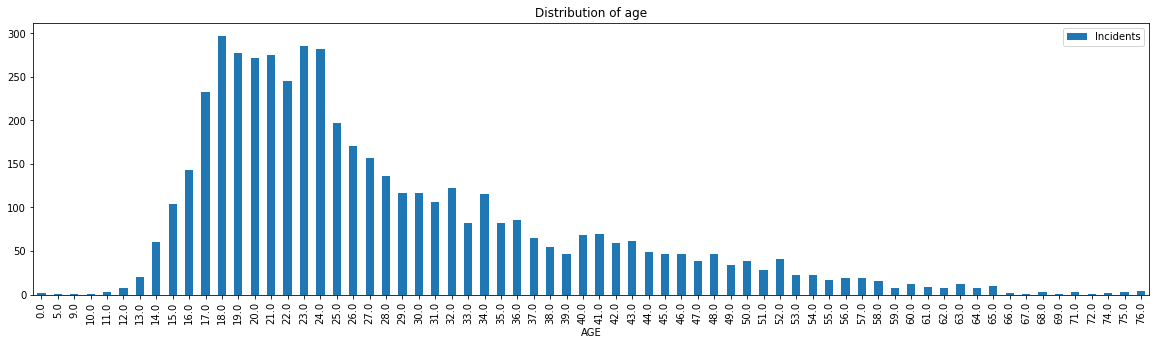

In [68]:
incidents_by_age.plot(kind='bar', x='AGE', y='Incidents', orientation='vertical', title='Distribution of age', figsize=(20,5))

In [12]:
age_bins = pd.IntervalIndex.from_tuples([(10, 17), (18, 20), (21, 25)])

In [23]:
incidents_by_age_groups = pd.cut(incidents_by_age.AGE, age_bins)

In [17]:
incidents_by_age_groups.shape

(68,)

In [25]:
incidents_by_age_groups = incidents_by_age.groupby(incidents_by_age, incidents_by_age_groups).size().unstack()

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [19]:
incidents_by_age_groups